In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [15]:
data_train = pd.read_csv('train.csv').set_index('Id')
data_test = pd.read_csv('test.csv').set_index('Id')

data = pd.concat([data_train.iloc[:,:-1], data_test])

data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [16]:
list(zip(data_train.columns,data_train.dtypes, data.dtypes))

[('MSSubClass', dtype('int64'), dtype('int64')),
 ('MSZoning', dtype('O'), dtype('O')),
 ('LotFrontage', dtype('float64'), dtype('float64')),
 ('LotArea', dtype('int64'), dtype('int64')),
 ('Street', dtype('O'), dtype('O')),
 ('Alley', dtype('O'), dtype('O')),
 ('LotShape', dtype('O'), dtype('O')),
 ('LandContour', dtype('O'), dtype('O')),
 ('Utilities', dtype('O'), dtype('O')),
 ('LotConfig', dtype('O'), dtype('O')),
 ('LandSlope', dtype('O'), dtype('O')),
 ('Neighborhood', dtype('O'), dtype('O')),
 ('Condition1', dtype('O'), dtype('O')),
 ('Condition2', dtype('O'), dtype('O')),
 ('BldgType', dtype('O'), dtype('O')),
 ('HouseStyle', dtype('O'), dtype('O')),
 ('OverallQual', dtype('int64'), dtype('int64')),
 ('OverallCond', dtype('int64'), dtype('int64')),
 ('YearBuilt', dtype('int64'), dtype('int64')),
 ('YearRemodAdd', dtype('int64'), dtype('int64')),
 ('RoofStyle', dtype('O'), dtype('O')),
 ('RoofMatl', dtype('O'), dtype('O')),
 ('Exterior1st', dtype('O'), dtype('O')),
 ('Exterior2n

#### Descriptions of each column in 'data_description.txt'.

In [17]:
#examine data_description
file = open('data_description.txt', 'r')
text = file.read()
print(text)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

#### Next we compare the training and test datasets. The two sets are not imbalanced in any way.

In [18]:
display(data_train.describe())

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [19]:
display(data_test.describe())

# compute a relative differences of means. Nothing abnormaly.
(data_train.describe().loc['mean']-data_test.describe().loc['mean'])/(data_train.describe().loc['mean']+data_test.describe().loc['mean'])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


1stFlrSF         0.002627
2ndFlrSF         0.031242
3SsnPorch        0.310380
BedroomAbvGr     0.002173
BsmtFinSF1       0.005025
BsmtFinSF2      -0.061209
BsmtFullBath    -0.010598
BsmtHalfBath    -0.062477
BsmtUnfSF        0.011543
EnclosedPorch   -0.049553
Fireplaces       0.026623
FullBath        -0.001872
GarageArea       0.000223
GarageCars       0.000285
GarageYrBlt      0.000198
GrLivArea        0.009801
HalfBath         0.006865
KitchenAbvGr     0.001953
LotArea          0.034307
LotFrontage      0.010601
LowQualFinSF     0.245099
MSSubClass      -0.004210
MasVnrArea       0.014561
MiscVal         -0.144396
MoSold           0.017523
OpenPorchSF     -0.017411
OverallCond      0.001935
OverallQual      0.001683
PoolArea         0.225295
SalePrice             NaN
ScreenPorch     -0.062364
TotRmsAbvGrd     0.010278
TotalBsmtSF      0.005377
WoodDeckSF       0.005708
YearBuilt       -0.000023
YearRemodAdd     0.000303
YrSold           0.000011
Name: mean, dtype: float64

#### One more sanity check: compare the distributions of house type in the training and test sets.

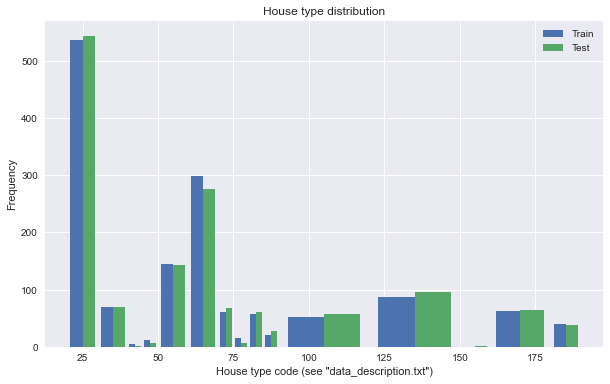

In [20]:
# visualize the distribution of type of houses "MSSubClass"
plt.style.use('seaborn')
plt.figure(figsize=(10,6))
#bins=len(set(data_train.MSSubClass.values))
bins=[20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190]
plt.hist([data_train['MSSubClass'],data_test.MSSubClass], bins=bins, label=['Train','Test'])

#plt.xticks(np.array(bins),bins)
plt.ylabel('Frequency')
plt.xlabel('House type code (see "data_description.txt")')
plt.title('House type distribution')

plt.legend()
plt.show()

#conclusion: training and test sets have similar house type distributions.

#### Next, see how many 'NaN'/'None' values in each columns.
Combine the following counts with the column description in 'data_description.txt', we conclude that most of the 'NaN'/'None' values are indicating 'Not applicable'.

In [21]:
n_na=[]
for col in data.columns:
    n_na.append((sum(data_train[col].isna()), sum(data_test[col].isna())))

n_Na = list(zip(data_train.columns, n_na))

n_Na

[('MSSubClass', (0, 0)),
 ('MSZoning', (0, 4)),
 ('LotFrontage', (259, 227)),
 ('LotArea', (0, 0)),
 ('Street', (0, 0)),
 ('Alley', (1369, 1352)),
 ('LotShape', (0, 0)),
 ('LandContour', (0, 0)),
 ('Utilities', (0, 2)),
 ('LotConfig', (0, 0)),
 ('LandSlope', (0, 0)),
 ('Neighborhood', (0, 0)),
 ('Condition1', (0, 0)),
 ('Condition2', (0, 0)),
 ('BldgType', (0, 0)),
 ('HouseStyle', (0, 0)),
 ('OverallQual', (0, 0)),
 ('OverallCond', (0, 0)),
 ('YearBuilt', (0, 0)),
 ('YearRemodAdd', (0, 0)),
 ('RoofStyle', (0, 0)),
 ('RoofMatl', (0, 0)),
 ('Exterior1st', (0, 1)),
 ('Exterior2nd', (0, 1)),
 ('MasVnrType', (8, 16)),
 ('MasVnrArea', (8, 15)),
 ('ExterQual', (0, 0)),
 ('ExterCond', (0, 0)),
 ('Foundation', (0, 0)),
 ('BsmtQual', (37, 44)),
 ('BsmtCond', (37, 45)),
 ('BsmtExposure', (38, 44)),
 ('BsmtFinType1', (37, 42)),
 ('BsmtFinSF1', (0, 1)),
 ('BsmtFinType2', (38, 42)),
 ('BsmtFinSF2', (0, 1)),
 ('BsmtUnfSF', (0, 1)),
 ('TotalBsmtSF', (0, 1)),
 ('Heating', (0, 0)),
 ('HeatingQC', (0, 0)

In [22]:

corrs = [(col, abs(data_train.SalePrice.corr(data_train[col]))) for col in data_train.columns[:-1] if data_train[col].dtype in ['int64','float64','bool']]
corrs.sort(key= lambda x:x[1], reverse=True)

corrs = dict(corrs)
corrs

{'OverallQual': 0.7909816005838048,
 'GrLivArea': 0.7086244776126522,
 'GarageCars': 0.6404091972583531,
 'GarageArea': 0.6234314389183617,
 'TotalBsmtSF': 0.6135805515591956,
 '1stFlrSF': 0.6058521846919147,
 'FullBath': 0.5606637627484456,
 'TotRmsAbvGrd': 0.5337231555820284,
 'YearBuilt': 0.5228973328794969,
 'YearRemodAdd': 0.5071009671113864,
 'GarageYrBlt': 0.4863616774878608,
 'MasVnrArea': 0.477493047095716,
 'Fireplaces': 0.46692883675152763,
 'BsmtFinSF1': 0.38641980624215316,
 'LotFrontage': 0.3517990965706781,
 'WoodDeckSF': 0.3244134445681295,
 '2ndFlrSF': 0.3193338028320677,
 'OpenPorchSF': 0.31585622711605543,
 'HalfBath': 0.2841076755947829,
 'LotArea': 0.26384335387140573,
 'BsmtFullBath': 0.22712223313149404,
 'BsmtUnfSF': 0.21447910554696895,
 'BedroomAbvGr': 0.16821315430073996,
 'KitchenAbvGr': 0.1359073708421411,
 'EnclosedPorch': 0.1285779579259565,
 'ScreenPorch': 0.1114465711429111,
 'PoolArea': 0.09240354949187317,
 'MSSubClass': 0.08428413512659526,
 'Overall

'MSSubClass' should be categorical rather than numeric or ordinal, 
change its dtype to 'str' and later replaced with dummy variables.


In [23]:
data_train['MSSubClass'] = data_train['MSSubClass'].apply(str)
data_test['MSSubClass'] = data_test['MSSubClass'].apply(str)

In [24]:
data_train['YrSold'] = data_train['YrSold'].astype('str')
data_test['YrSold'] = data_test['YrSold'].astype('str')

In [25]:

data_train.shape, data_test.shape

((1460, 80), (1459, 79))

In [26]:
# exam the 1 missing value for 'electrical'
data_train.loc[data_train.Electrical.isna(), 'Electrical'] = data
# 'street'=Pave, 'YrSold'=2008, it's unlikely that this house does not have an electrical system.
# Must be missing data. Fill in mean value.



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [396]:
data_train[data_train.BsmtExposure.isna()| data_train.BsmtFinType2.isna()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,
18,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
260,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
333,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0
343,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0


In [374]:
#delete the two missing unit rows
data_train=data_train.drop([332,948])

In [375]:
data_train[data_train.BsmtExposure.isna()| data_train.BsmtFinType2.isna()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']];

#### Same inspection for test set

In [376]:
n_na=[]
for col in data_test.columns:
    n_na.append(sum(data_test[col].isna()))

list(zip(data_test.columns, n_na))

[('MSSubClass', 0),
 ('MSZoning', 4),
 ('LotFrontage', 227),
 ('LotArea', 0),
 ('Street', 0),
 ('Alley', 1352),
 ('LotShape', 0),
 ('LandContour', 0),
 ('Utilities', 2),
 ('LotConfig', 0),
 ('LandSlope', 0),
 ('Neighborhood', 0),
 ('Condition1', 0),
 ('Condition2', 0),
 ('BldgType', 0),
 ('HouseStyle', 0),
 ('OverallQual', 0),
 ('OverallCond', 0),
 ('YearBuilt', 0),
 ('YearRemodAdd', 0),
 ('RoofStyle', 0),
 ('RoofMatl', 0),
 ('Exterior1st', 1),
 ('Exterior2nd', 1),
 ('MasVnrType', 16),
 ('MasVnrArea', 15),
 ('ExterQual', 0),
 ('ExterCond', 0),
 ('Foundation', 0),
 ('BsmtQual', 44),
 ('BsmtCond', 45),
 ('BsmtExposure', 44),
 ('BsmtFinType1', 42),
 ('BsmtFinSF1', 1),
 ('BsmtFinType2', 42),
 ('BsmtFinSF2', 1),
 ('BsmtUnfSF', 1),
 ('TotalBsmtSF', 1),
 ('Heating', 0),
 ('HeatingQC', 0),
 ('CentralAir', 0),
 ('Electrical', 0),
 ('1stFlrSF', 0),
 ('2ndFlrSF', 0),
 ('LowQualFinSF', 0),
 ('GrLivArea', 0),
 ('BsmtFullBath', 2),
 ('BsmtHalfBath', 2),
 ('FullBath', 0),
 ('HalfBath', 0),
 ('Bedroom

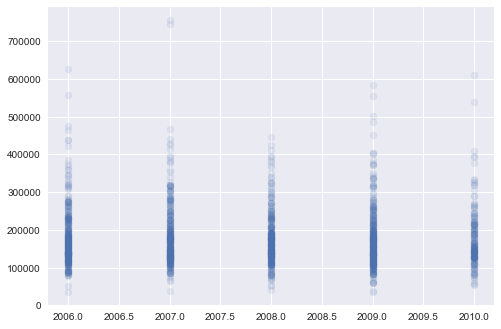

In [377]:
plt.scatter(data_train.YrSold, data_train.SalePrice, alpha=0.1)


In [378]:
data_train.groupby('YrSold')[['SalePrice']].mean()

,SalePrice
YrSold,
2006,182867.507987
2007,185950.388379
2008,177360.838816
2009,179432.103550
2010,177393.674286


'YrSold' should be categorical, change dtype into 'str' to get dummy variables later.

KeyError: 0

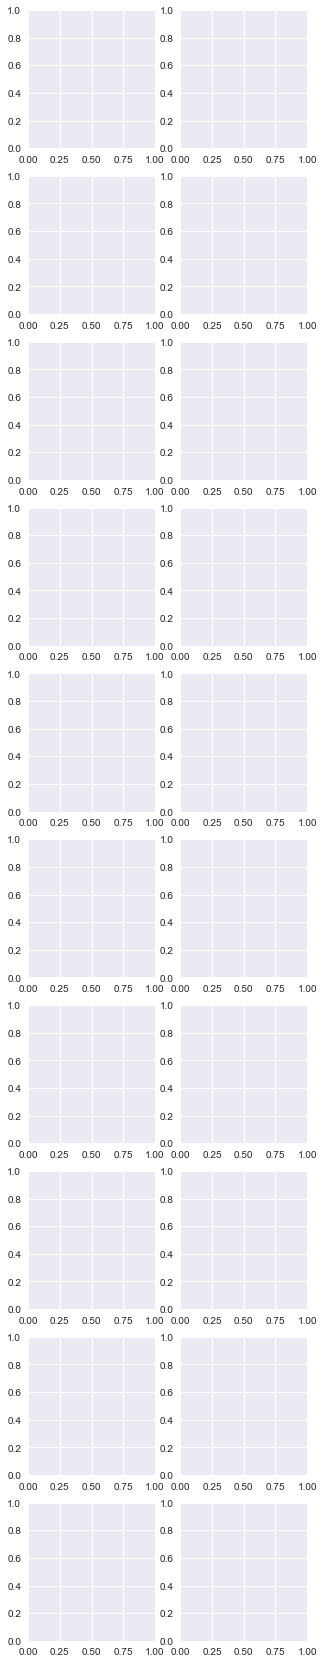

In [380]:
fig,ax=plt.subplots(10,2,figsize=(5,30))

for i in range(10):
    ax[i][0].scatter(data_train[corrs[i][0]], data_train.SalePrice)
    ax[i][0].set_xlabel(corrs[i][0])
    
    ax[i][1].scatter(data_train[corrs[i][0]], data_train.SalePrice)
    ax[i][1].set_xlabel(corrs[i][0])
    ax[i][1].set_yscale('log')
    

plt.show()

In [413]:
data_train[(data_train.GrLivArea>4000) & (data_train.SalePrice<200000)][['SalePrice', 'OverallQual','YrSold','SaleType','SaleCondition','1stFlrSF']]

,SalePrice,OverallQual,YrSold,SaleType,SaleCondition,1stFlrSF
Id,,,,,,
524,184750,10,2007,New,Partial,3138
1299,160000,10,2008,New,Partial,4692


In [414]:
data_train = data_train.drop([524,1299])

In [415]:
data_train[data_train.GarageCars >3][['GarageArea','GarageCars']]

,GarageArea,GarageCars
Id,,
421,784,4
748,864,4
1191,1356,4
1341,480,4
1351,968,4


In [383]:
data_train[data_train.SaleCondition == 'Partial']

data_train.SaleCondition.value_counts()

Normal     1195
Partial     123
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

### Prepare training and test datasets

In [416]:
data_train.shape, data_test.shape

((1458, 80), (1459, 79))

In [417]:
x_all = pd.concat([data_train.iloc[:,:-1], data_test])
y_train = data_train['SalePrice'].apply(np.log)
exp_y_train = data_train['SalePrice']
x_all.shape, y_train.dtype

((2917, 79), dtype('float64'))

In [418]:
cat_vars = [col for col in x_all.columns if x_all[col].dtype not in ['int64','float64','bool']]

#cat_vars_test = [col for col in data_test.columns if data_test[col].dtype not in ['int64','float64','bool']]

In [419]:
x_all_dummies = pd.get_dummies(x_all, prefix=cat_vars, dummy_na=True)
x_train_dummies = x_all_dummies[:len(data_train)]
x_test_dummies = x_all_dummies[len(data_train):]

x_train_dummies.shape, x_test_dummies.shape, y_train.shape

((1458, 351), (1459, 351), (1458,))

In [420]:
from sklearn.model_selection import train_test_split

In [421]:
x_train, x_cv, y_train, y_cv, exp_y_train, exp_y_cv = train_test_split(x_train_dummies, y_train, exp_y_train, test_size=0.35,random_state =57)

#x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.33, random_state=57)

#x_train.shape, len(y_train), x_cv.shape, y_test.shape

In [422]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.fit_transform(x_cv)
x_test_scaled = scaler.fit_transform(x_test_dummies)



In [218]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)


In [423]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as mse


In [424]:
DM_train = xgb.DMatrix(x_train.values, label=y_train)
DM_cv = xgb.DMatrix(x_cv, label=y_cv)
#DM_test = xgb.DMatrix(x_test, label=y_test)

In [425]:
model_xgb = XGBRegressor(learning_rate=.1, n_estimators = 20000, max_depth = 2)
exp_model_xgb = XGBRegressor(learning_rate=.1, n_estimators = 20000, max_depth = 2)

In [426]:
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [427]:
pred_cv=model_xgb.predict(x_cv)
pred_train = model_xgb.predict(x_train)
pred_test = model_xgb.predict(x_test_dummies)

In [428]:
exp_model_xgb.fit(x_train, exp_y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [429]:
exp_pred_cv=exp_model_xgb.predict(x_cv)
exp_pred_train = exp_model_xgb.predict(x_train)
exp_pred_test = exp_model_xgb.predict(x_test_dummies)

In [430]:
rmse_train = np.sqrt(mse(pred_train, y_train))
rmse_cv = np.sqrt(mse(pred_cv, y_cv))
exp_rmse_train = np.sqrt(mse(np.exp(pred_train), np.exp(y_train)))
exp_rmse_cv = np.sqrt(mse(np.exp(pred_cv), np.exp(y_cv)))




rmse_train, rmse_cv, exp_rmse_train, exp_rmse_cv, np.sqrt(mse(exp_pred_train, exp_y_train)), np.sqrt(mse(exp_pred_cv, exp_y_cv))

(0.002627518984462876,
 0.11784840893829153,
 462.86081291047105,
 25729.52117682993,
 35.19233942823229,
 22204.672854644217)

In [ ]:
list(zip(pred_cv, y_cv))

In [431]:
results = pd.DataFrame({'Id':x_test_dummies.index, 'SalePrice':np.exp(pred_test)}).set_index('Id', drop=True)
results

,SalePrice
Id,
1461,124549.460938
1462,161176.343750
1463,181150.812500
1464,201874.906250
1465,175104.171875
...,...
2915,75113.968750
2916,74741.187500
2917,143196.078125


In [432]:
results.to_csv('result1.csv')

In [320]:
results2 = pd.DataFrame({'Id':x_test_dummies.index, 'SalePrice':exp_pred_test}).set_index('Id', drop=True)
results2

,SalePrice
Id,
1461,127534.937500
1462,166572.828125
1463,188385.328125
1464,203032.609375
1465,187934.718750
...,...
2915,76784.195312
2916,74215.375000
2917,151288.234375


In [321]:
results2.to_csv('result2.csv')

In [ ]:
from sklearn.model_selection import GridSearchCV

